In [35]:
import pandas as pd
import chess.pgn
from tqdm import tqdm
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.stats import ttest_ind
from bs4 import BeautifulSoup
import requests
from matplotlib.ticker import FuncFormatter

In [7]:
# turning PGN format into CSV
batch_size = 10000  
data = []
counter = 0

# progress bar
pbar = tqdm(total=4000000)  

with open("Data/Caissabase_2022_12_24/caissabase.pgn", encoding='utf-8') as pgn:
    while True:
        game = chess.pgn.read_game(pgn)
        if game is None:
            break  # eof

        info = {
            'white': game.headers['White'],
            'black': game.headers['Black'],
            'whiteElo': game.headers.get('WhiteElo'),  # get() is used to avoid KeyError if the header is not present
            'blackElo': game.headers.get('BlackElo'),
            'site': game.headers.get('Site'),
            'event': game.headers.get('Event'),
            'date': game.headers.get('Date'),
            'moves': " ".join(str(move) for move in game.mainline_moves()),  # get all moves
        }

        data.append(info)
        counter += 1
        pbar.update(1)  # update the progress bar

        # when we've collected enough games for a batch, write them to the CSV file
        if counter % batch_size == 0:
            df = pd.DataFrame(data)
            df.to_csv('chess_games.csv', mode='a', header=(counter == batch_size), index=False)  # append to the CSV file
            data = []  # clear the list for the next batch

# write any remaining games to the CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv('chess_games.csv', mode='a', header=False, index=False)

pbar.close()  # close the progress bar


4874268it [4:12:33, 321.65it/s]                               


In [31]:
chess_data = pd.read_csv('chess_games.csv')
chess_data.head()

,white,black,whiteElo,blackElo,site,event,date,moves
0,"Hossain, Enam","Murshed, N",2372.0,2419.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 c7c5 g1f3 b8c6 d2d4 c5d4 f3d4 g7g6 c2c4 g...
1,"Anata, Choudhury","Mohammad Fahad, Rahman",2188.0,2361.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
2,Wang Hao,"Rapport, R",2722.0,2740.0,Baku AZE,8th Gashimov Mem Rapid,2022.12.19,e2e4 e7e6 d2d4 d7d5 b1d2 c7c5 e4d5 e6d5 g1f3 b...
3,"Hrishin, Talukder","Manon, Reja Neer",1942.0,2215.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 c7c6 d2d4 d7d5 e4e5 c8f5 g1f3 e7e6 f1e2 b...
4,"Samant, Aditya S","Cheparinov, I",2470.0,2688.0,Sitges ESP,9th Sunway Sitges 2022,2022.12.19,e2e4 c7c5 g1f3 e7e6 d2d4 c5d4 f3d4 b8c6 b1c3 a...


In [22]:
chess_data

,white,black,whiteElo,blackElo,site,event,date,moves
0,"Hossain, Enam","Murshed, N",2372.0,2419.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 c7c5 g1f3 b8c6 d2d4 c5d4 f3d4 g7g6 c2c4 g...
1,"Anata, Choudhury","Mohammad Fahad, Rahman",2188.0,2361.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
2,Wang Hao,"Rapport, R",2722.0,2740.0,Baku AZE,8th Gashimov Mem Rapid,2022.12.19,e2e4 e7e6 d2d4 d7d5 b1d2 c7c5 e4d5 e6d5 g1f3 b...
3,"Hrishin, Talukder","Manon, Reja Neer",1942.0,2215.0,Dhaka BAN,47th ch-Bangahbandhu 2022,2022.12.19,e2e4 c7c6 d2d4 d7d5 e4e5 c8f5 g1f3 e7e6 f1e2 b...
4,"Samant, Aditya S","Cheparinov, I",2470.0,2688.0,Sitges ESP,9th Sunway Sitges 2022,2022.12.19,e2e4 c7c5 g1f3 e7e6 d2d4 c5d4 f3d4 b8c6 b1c3 a...
...,...,...,...,...,...,...,...,...
4874254,"Bowdler, Thomas",De Beaurevoir,NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f2f4 e5f4 g1f3 g7g5 d2d4 d8e7 f1d3 d...
4874255,Count Bruehl,"Philidor, Francois A D",NaN,NaN,London ENG,London,1783.??.??,e2e4 e7e5 f1c4 c7c6 d1e2 d7d6 c2c3 f7f5 d2d3 g...
4874256,"Philidor, Francois A D",Analysis\ Analyse,NaN,NaN,?,Game one,1749.??.??,e2e4 e7e5 f1c4 f8c5 c2c3 g8f6 d2d4 e5d4 c3d4 c...
4874257,"Greco, Gioacchino",Analysis\ Analyse,NaN,NaN,?,approx.,1625.??.??,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d4 e...


In [15]:
# get all rows that contain at least one null value
null_rows = chess_data[chess_data.isnull().any(axis=1)]
pd.set_option('display.max_rows', 5000)
null_rows

,white,black,whiteElo,blackElo,site,event,date,moves
27,"Ajay, Karthikeyan","Kollars, Dmitrij",2430.0,2610.0,Sitges ESP,9th Sunway Sitges 2022,2022.12.19,NaN
29,"Safarli, E","Abdisalimov, Abdimalik",2616.0,2447.0,Sitges ESP,9th Sunway Sitges 2022,2022.12.19,NaN
494,"Vovk, Y","Vypkhaniuk, Ihor",2553.0,2409.0,Lviv UKR,19th Vasylyshyn GM,2022.12.18,NaN
586,"Kopylov, Daniel","Storme, Isak",2336.0,2433.0,Malmo SWE,Malmo Open 2022,2022.12.18,NaN
884,"Biegalski, Arkadiusz","Licznerski, L",1722.0,2441.0,Katowice POL,European Rapid 2022,2022.12.17,NaN
...,...,...,...,...,...,...,...,...
4874254,"Bowdler, Thomas",De Beaurevoir,NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f2f4 e5f4 g1f3 g7g5 d2d4 d8e7 f1d3 d...
4874255,Count Bruehl,"Philidor, Francois A D",NaN,NaN,London ENG,London,1783.??.??,e2e4 e7e5 f1c4 c7c6 d1e2 d7d6 c2c3 f7f5 d2d3 g...
4874256,"Philidor, Francois A D",Analysis\ Analyse,NaN,NaN,?,Game one,1749.??.??,e2e4 e7e5 f1c4 f8c5 c2c3 g8f6 d2d4 e5d4 c3d4 c...
4874257,"Greco, Gioacchino",Analysis\ Analyse,NaN,NaN,?,approx.,1625.??.??,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d4 e...


In [32]:
# remove the last 9 rows with no values at all
chess_data = chess_data.iloc[:-9]
chess_data.tail(10)

,white,black,whiteElo,blackElo,site,event,date,moves
4874249,"Bowdler, Thomas","Conway, M.",NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f1c4 f8c5 d2d3 c7c6 d1e2 d7d6 f2f4 e...
4874250,Harrowby,"Bowdler, Thomas",NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f1c4 f8c5 d2d3 b8c6 c2c3 d8e7 d1e2 d...
4874251,"Von Bruehl, Hans Moritz","Philidor, Francois A D",NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f2f4 e5f4 g1f3 g7g5 f1c4 f8g7 h2h4 h...
4874252,"Conway, M.","Von Bruehl, Hans Moritz",NaN,NaN,London ENG,London m2,1788.??.??,e2e4 e7e5 f1c4 c7c6 c4b3 d7d5 e4d5 c6d5 g1e2 f...
4874253,Cotter,"Von Bruehl, Hans Moritz",NaN,NaN,London ENG,London m1,1788.??.??,e2e4 e7e5 f2f4 e5f4 g1f3 g7g5 h2h4 g5g4 f3g5 h...
4874254,"Bowdler, Thomas",De Beaurevoir,NaN,NaN,London ENG,London,1788.??.??,e2e4 e7e5 f2f4 e5f4 g1f3 g7g5 d2d4 d8e7 f1d3 d...
4874255,Count Bruehl,"Philidor, Francois A D",NaN,NaN,London ENG,London,1783.??.??,e2e4 e7e5 f1c4 c7c6 d1e2 d7d6 c2c3 f7f5 d2d3 g...
4874256,"Philidor, Francois A D",Analysis\ Analyse,NaN,NaN,?,Game one,1749.??.??,e2e4 e7e5 f1c4 f8c5 c2c3 g8f6 d2d4 e5d4 c3d4 c...
4874257,"Greco, Gioacchino",Analysis\ Analyse,NaN,NaN,?,approx.,1625.??.??,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d4 e...
4874258,"Polerio, Giulio Cesare",Domenico,NaN,NaN,Rome ITA,Rome,1610.??.??,e2e4 e7e5 g1f3 b8c6 f1c4 g8f6 f3g5 d7d5 e4d5 f...


ai) VISUALIZATIONS

1) TOP 10 PLAYERS WHO HAVE PLAYED THE MOST GAMES (BAR CHART)

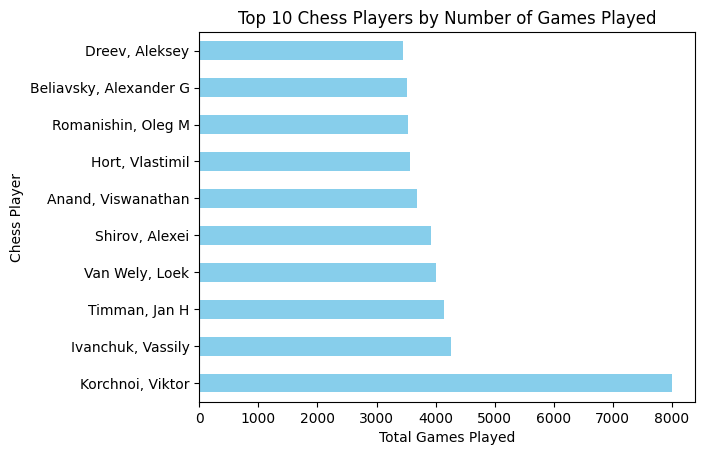

In [6]:
# concatenate the 'white' and 'black' Series and count the number of games played by each player
player_counts = pd.concat([chess_data['white'], chess_data['black']]).value_counts()

# plot the 10 players who have played the most games
player_counts.head(10).plot(kind='barh', color='skyblue')

# change the labels for the x and y axes and the title of the plot
plt.xlabel('Total Games Played')
plt.ylabel('Chess Player')
plt.title('Top 10 Chess Players by Number of Games Played')

plt.show()

2) WHERE DOES MOST OF THE ACTION TAKES PLACE ON THE BOARD (HEATMAP)

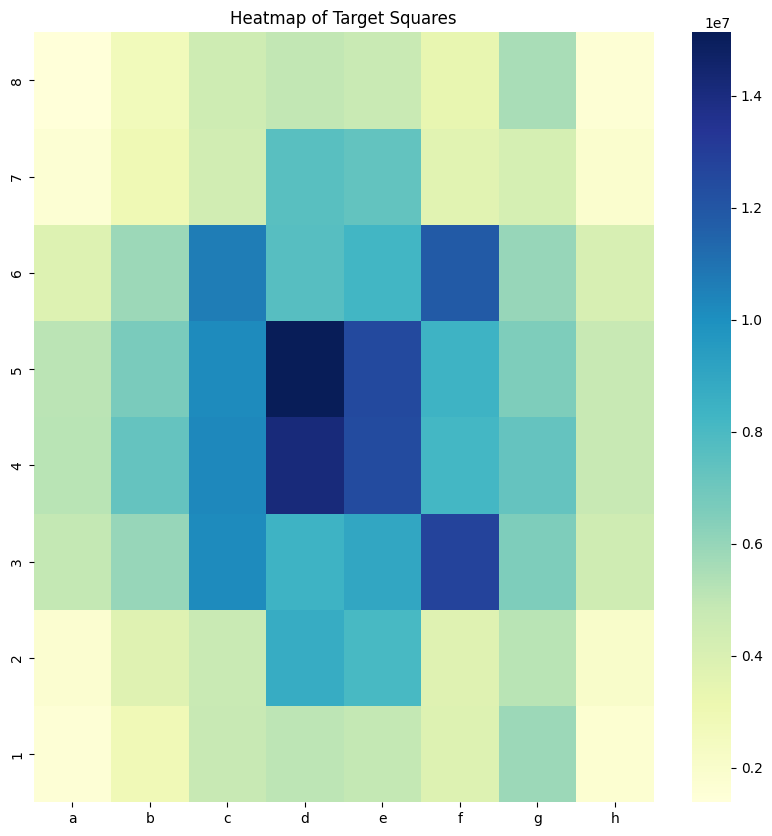

In [6]:
# create a dictionary to map each square to its coordinates
square_to_coordinates = {f'{chr(97+i)}{j+1}': (i, j) for i in range(8) for j in range(8)}

# initialize a 2D array to store the counts
counts = np.zeros((8, 8))

# iterate over the games
for moves in chess_data['moves']:
    if pd.isna(moves):
        continue
    # split the moves into a list
    moves = moves.split()
    # iterate over the moves
    for move in moves:
        # ignore castling moves
        if 'O' in move:
            continue
        # get the target square of the move
        target_square = move[-2:]
        # update the counts
        if target_square in square_to_coordinates:
            x, y = square_to_coordinates[target_square]
            counts[y, x] += 1

# dataFrame from the counts
df = pd.DataFrame(counts, columns=list('abcdefgh'), index=range(1, 9)[::-1])

# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, cmap='YlGnBu')
plt.title('Heatmap of Target Squares')
plt.show()

In [7]:
# convert DataFrame to dictionary
moves_dict = df.to_dict()

for key, value in moves_dict.items():
    print(f"Square: {key}, Number of Moves: {value}")

Square: a, Number of Moves: {8: 1380098.0, 7: 1655251.0, 6: 3846272.0, 5: 5119192.0, 4: 5193607.0, 3: 4925451.0, 2: 1803165.0, 1: 1557736.0}
Square: b, Number of Moves: {8: 2681441.0, 7: 2971297.0, 6: 5891197.0, 5: 6678362.0, 4: 7263430.0, 3: 5984373.0, 2: 3760009.0, 1: 2869060.0}
Square: c, Number of Moves: {8: 4535011.0, 7: 4355504.0, 6: 10639311.0, 5: 10174070.0, 4: 10266425.0, 3: 10150472.0, 2: 4711000.0, 1: 4803209.0}
Square: d, Number of Moves: {8: 4977048.0, 7: 7574905.0, 6: 7636168.0, 5: 15131944.0, 4: 14162637.0, 3: 8385597.0, 2: 8710382.0, 1: 5039059.0}
Square: e, Number of Moves: {8: 4738096.0, 7: 7300973.0, 6: 8249187.0, 5: 12542229.0, 4: 12472386.0, 3: 9005282.0, 2: 8046152.0, 1: 4912235.0}
Square: f, Number of Moves: {8: 3330693.0, 7: 3673678.0, 6: 11836183.0, 5: 8395179.0, 4: 8156172.0, 3: 12785713.0, 2: 3772667.0, 1: 3803937.0}
Square: g, Number of Moves: {8: 5566743.0, 7: 4178775.0, 6: 5985267.0, 5: 6581357.0, 4: 7272417.0, 3: 6538408.0, 2: 5183816.0, 1: 5865711.0}
Squ

3) NUMBER OF MOVES ACROSS DIFFERENT GAMES (HISTOGRAM)

In [33]:
# remove rows where 'moves' is missing
chess_data = chess_data[chess_data['moves'].notna()]

# calculate the number of moves in each game
chess_data['num_moves'] = chess_data['moves'].apply(lambda x: len(x.split()))
chess_data['num_moves']

0           37
1           72
2           65
3          102
4           60
          ... 
4874254     27
4874255     94
4874256     79
4874257     37
4874258     41
Name: num_moves, Length: 4867754, dtype: int64

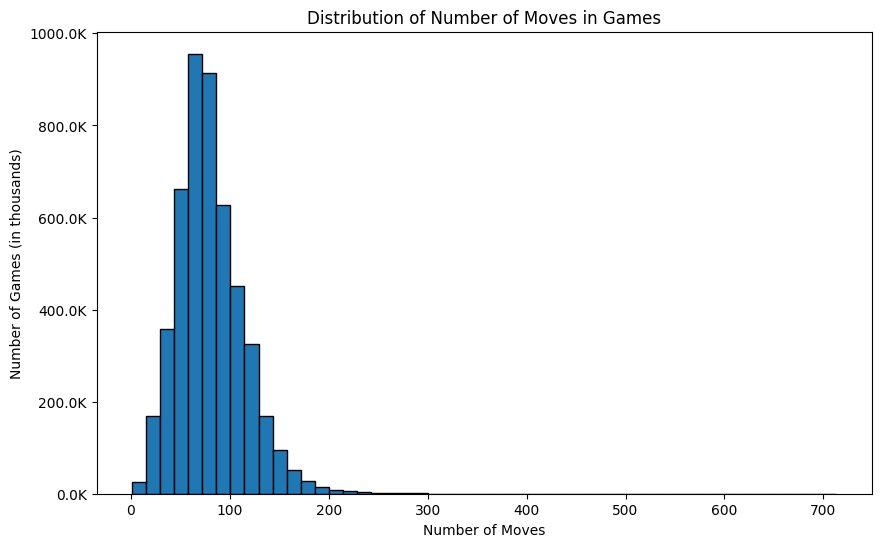

In [38]:
# plot a histogram of the number of moves vs number of games
plt.figure(figsize=(10, 6))
plt.hist(chess_data['num_moves'], bins=50, edgecolor='black')

# define a function to format the y-axis labels
def thousands_formatter(x, pos):
    return f'{x/1e3:.1f}K'

# apply formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.xlabel('Number of Moves')
plt.ylabel('Number of Games (in thousands)')
plt.title('Distribution of Number of Moves in Games')
plt.show()

4) NUMBER OF GAMES PLAYED OVER TIME (LINE CHART)

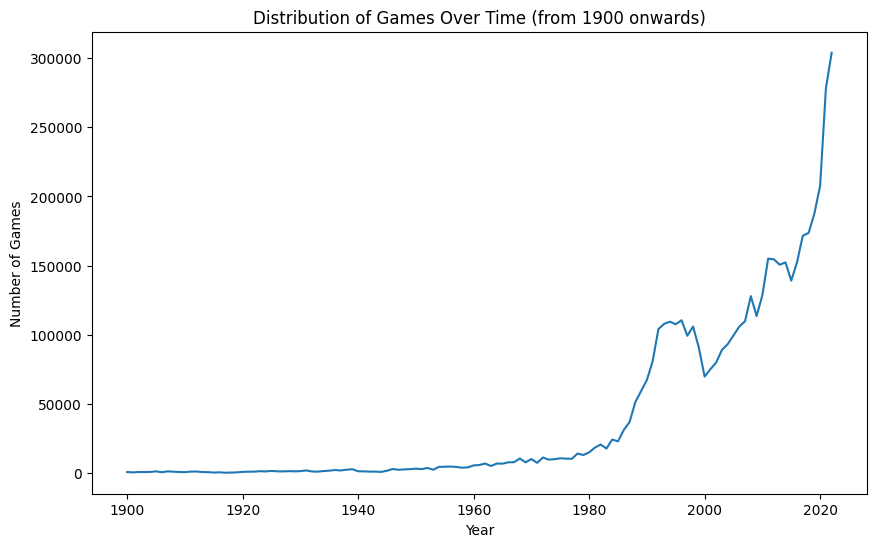

In [34]:
# extract year from 'date'
chess_data['year'] = chess_data['date'].str.extract('(\d{4})').dropna()

# convert 'year' to integer
chess_data['year'] = chess_data['year'].astype(int)

# filter to include only games from 1900 onwards
chess_data = chess_data[chess_data['year'] >= 1900]

# count the number of games per year
games_per_year = chess_data['year'].value_counts().sort_index()

# plot the number of games over time
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Distribution of Games Over Time (from 1900 onwards)')
plt.show()

aii) DESCRIBE AND RUN A STATISTICAL ANALYSIS ON THE DATA

Hypothesis Testing: t-test to see if there's a significant difference in the number of moves in games played by players above and below the average Elo rating. This involves dividing the dataset into two groups based on the average Elo rating, and then comparing the mean number of moves in each group.

In [13]:
average_elo = chess_data[['whiteElo', 'blackElo']].mean().mean()
high_elo_games = chess_data[(chess_data['whiteElo'] > average_elo) & (chess_data['blackElo'] > average_elo)]['num_moves']
low_elo_games = chess_data[(chess_data['whiteElo'] <= average_elo) & (chess_data['blackElo'] <= average_elo)]['num_moves']

ttest_ind(high_elo_games.dropna(), low_elo_games.dropna())

TtestResult(statistic=30.158799897757277, pvalue=8.90449220684147e-200, df=2606398.0)

 The result suggests that there is a statistically significant difference in the number of moves in games played by high Elo-rated players compared to low Elo-rated players.

In [14]:
# descriptive statistics for 'whiteElo'
print("Descriptive statistics for 'whiteElo':")
print(chess_data['whiteElo'].describe())

# descriptive statistics for 'blackElo'
print("\nDescriptive statistics for 'blackElo':")
print(chess_data['blackElo'].describe())

# descriptive statistics for 'num_moves'
print("\nDescriptive statistics for 'num_moves':")
print(chess_data['num_moves'].describe())

Descriptive statistics for 'whiteElo':
count    3.949037e+06
mean     2.280716e+03
std      2.548912e+02
min      1.000000e+02
25%      2.149000e+03
50%      2.315000e+03
75%      2.455000e+03
max      3.958000e+03
Name: whiteElo, dtype: float64

Descriptive statistics for 'blackElo':
count    3.940056e+06
mean     2.277888e+03
std      2.555960e+02
min      1.000000e+02
25%      2.145000e+03
50%      2.311000e+03
75%      2.452000e+03
max      3.958000e+03
Name: blackElo, dtype: float64

Descriptive statistics for 'num_moves':
count    4.867754e+06
mean     8.028572e+01
std      3.347651e+01
min      1.000000e+00
25%      5.800000e+01
50%      7.700000e+01
75%      9.900000e+01
max      7.130000e+02
Name: num_moves, dtype: float64


b) BAD VISUALIZATION

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population'


In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
states_population_list = soup.find('table', attrs={'class':"wikitable sortable plainrowheaders"})
states_population_df = pd.read_html(str(states_population_list))[0]
states_population_df

Rank                  State or territory Census population[8][a]  \
    2022  2020            State or territory     July 1, 2022 (est.)   
0    1.0   1.0                    California              39029342.0   
1    2.0   2.0                         Texas              30029572.0   
2    3.0   3.0                       Florida              22244823.0   
3    4.0   4.0                      New York              19677151.0   
4    5.0   5.0                  Pennsylvania              12972008.0   
5    6.0   6.0                      Illinois              12582032.0   
6    7.0   7.0                          Ohio              11756058.0   
7    8.0   8.0                       Georgia              10912876.0   
8    9.0   9.0                North Carolina              10698973.0   
9   10.0  10.0                      Michigan              10034113.0   
10  11.0  11.0                    New Jersey               9261699.0   
11  12.0  12.0                      Virginia               8683619.0   
12  13.0  13.0                    Washington               7785786.0   
13  14.0  14.0                       Arizona               7359197.0   
14  15.0  16.0                     Tennessee               7051339.0   
15  16.0  15.0                 Massachusetts               6981974.0   
16  17.0  17.0                       Indiana               6833037.0   
17  18.0  19.0                      Missouri               6177957.0   
18  19.0  18.0                      Maryland               6164660.0   
19  20.0  20.0                     Wisconsin               5892539.0   
20  21.0  21.0                      Colorado               5839926.0   
21  22.0  22.0                     Minnesota               5717184.0   
22  23.0  23.0                South Carolina               5282634.0   
23  24.0  24.0                       Alabama               5074296.0   
24  25.0  25.0                     Louisiana               4590241.0   
25  26.0  26.0                      Kentucky               4512310.0   
26  27.0  27.0                        Oregon               4240137.0   
27  28.0  28.0                      Oklahoma               4019800.0   
28  29.0  29.0                   Connecticut               3626205.0   
29  30.0  31.0                          Utah               3380800.0   
30  31.0  30.0                   Puerto Rico               3221789.0   
31  32.0  32.0                          Iowa               3200517.0   
32  33.0  33.0                        Nevada               3177772.0   
33  34.0  34.0                      Arkansas               3045637.0   
34  35.0  35.0                   Mississippi               2940057.0   
35  36.0  36.0                        Kansas               2937150.0   
36  37.0  37.0                    New Mexico               2113344.0   
37  38.0  38.0                      Nebraska               1967923.0   
38  39.0  39.0                         Idaho               1939033.0   
39  40.0  40.0                 West Virginia               1775156.0   
40  41.0  41.0                        Hawaii               1440196.0   
41  42.0  42.0                 New Hampshire               1395231.0   
42  43.0  43.0                         Maine               1385340.0   
43  44.0  45.0                       Montana               1122867.0   
44  45.0  44.0                  Rhode Island               1093734.0   
45  46.0  46.0                      Delaware               1018396.0   
46  47.0  47.0                  South Dakota                909824.0   
47  48.0  48.0                  North Dakota                779261.0   
48  49.0  49.0                        Alaska                733583.0   
49  50.0  50.0          District of Columbia                671803.0   
50  51.0  51.0                       Vermont                647064.0   
51  52.0  52.0                       Wyoming                581381.0   
52  53.0  53.0                      Guam[10]                     NaN   
53  54.0  54.0       U.S. Virgin Islands[11]

In [18]:
states = states_population_df['State or territory']
population_2022 = states_population_df['Census population[8][a]']['July 1, 2022 (est.)']
new_df = pd.concat([states, population_2022], axis=1)
new_df

,State or territory,"July 1, 2022 (est.)"
0,California,39029342.0
1,Texas,30029572.0
2,Florida,22244823.0
3,New York,19677151.0
4,Pennsylvania,12972008.0
5,Illinois,12582032.0
6,Ohio,11756058.0
7,Georgia,10912876.0
8,North Carolina,10698973.0
9,Michigan,10034113.0


In [19]:
# deleting the last unecessary rows that could disrupt the data 
new_df.drop(new_df.tail(8).index,
           inplace=True)
new_df

,State or territory,"July 1, 2022 (est.)"
0,California,39029342.0
1,Texas,30029572.0
2,Florida,22244823.0
3,New York,19677151.0
4,Pennsylvania,12972008.0
5,Illinois,12582032.0
6,Ohio,11756058.0
7,Georgia,10912876.0
8,North Carolina,10698973.0
9,Michigan,10034113.0


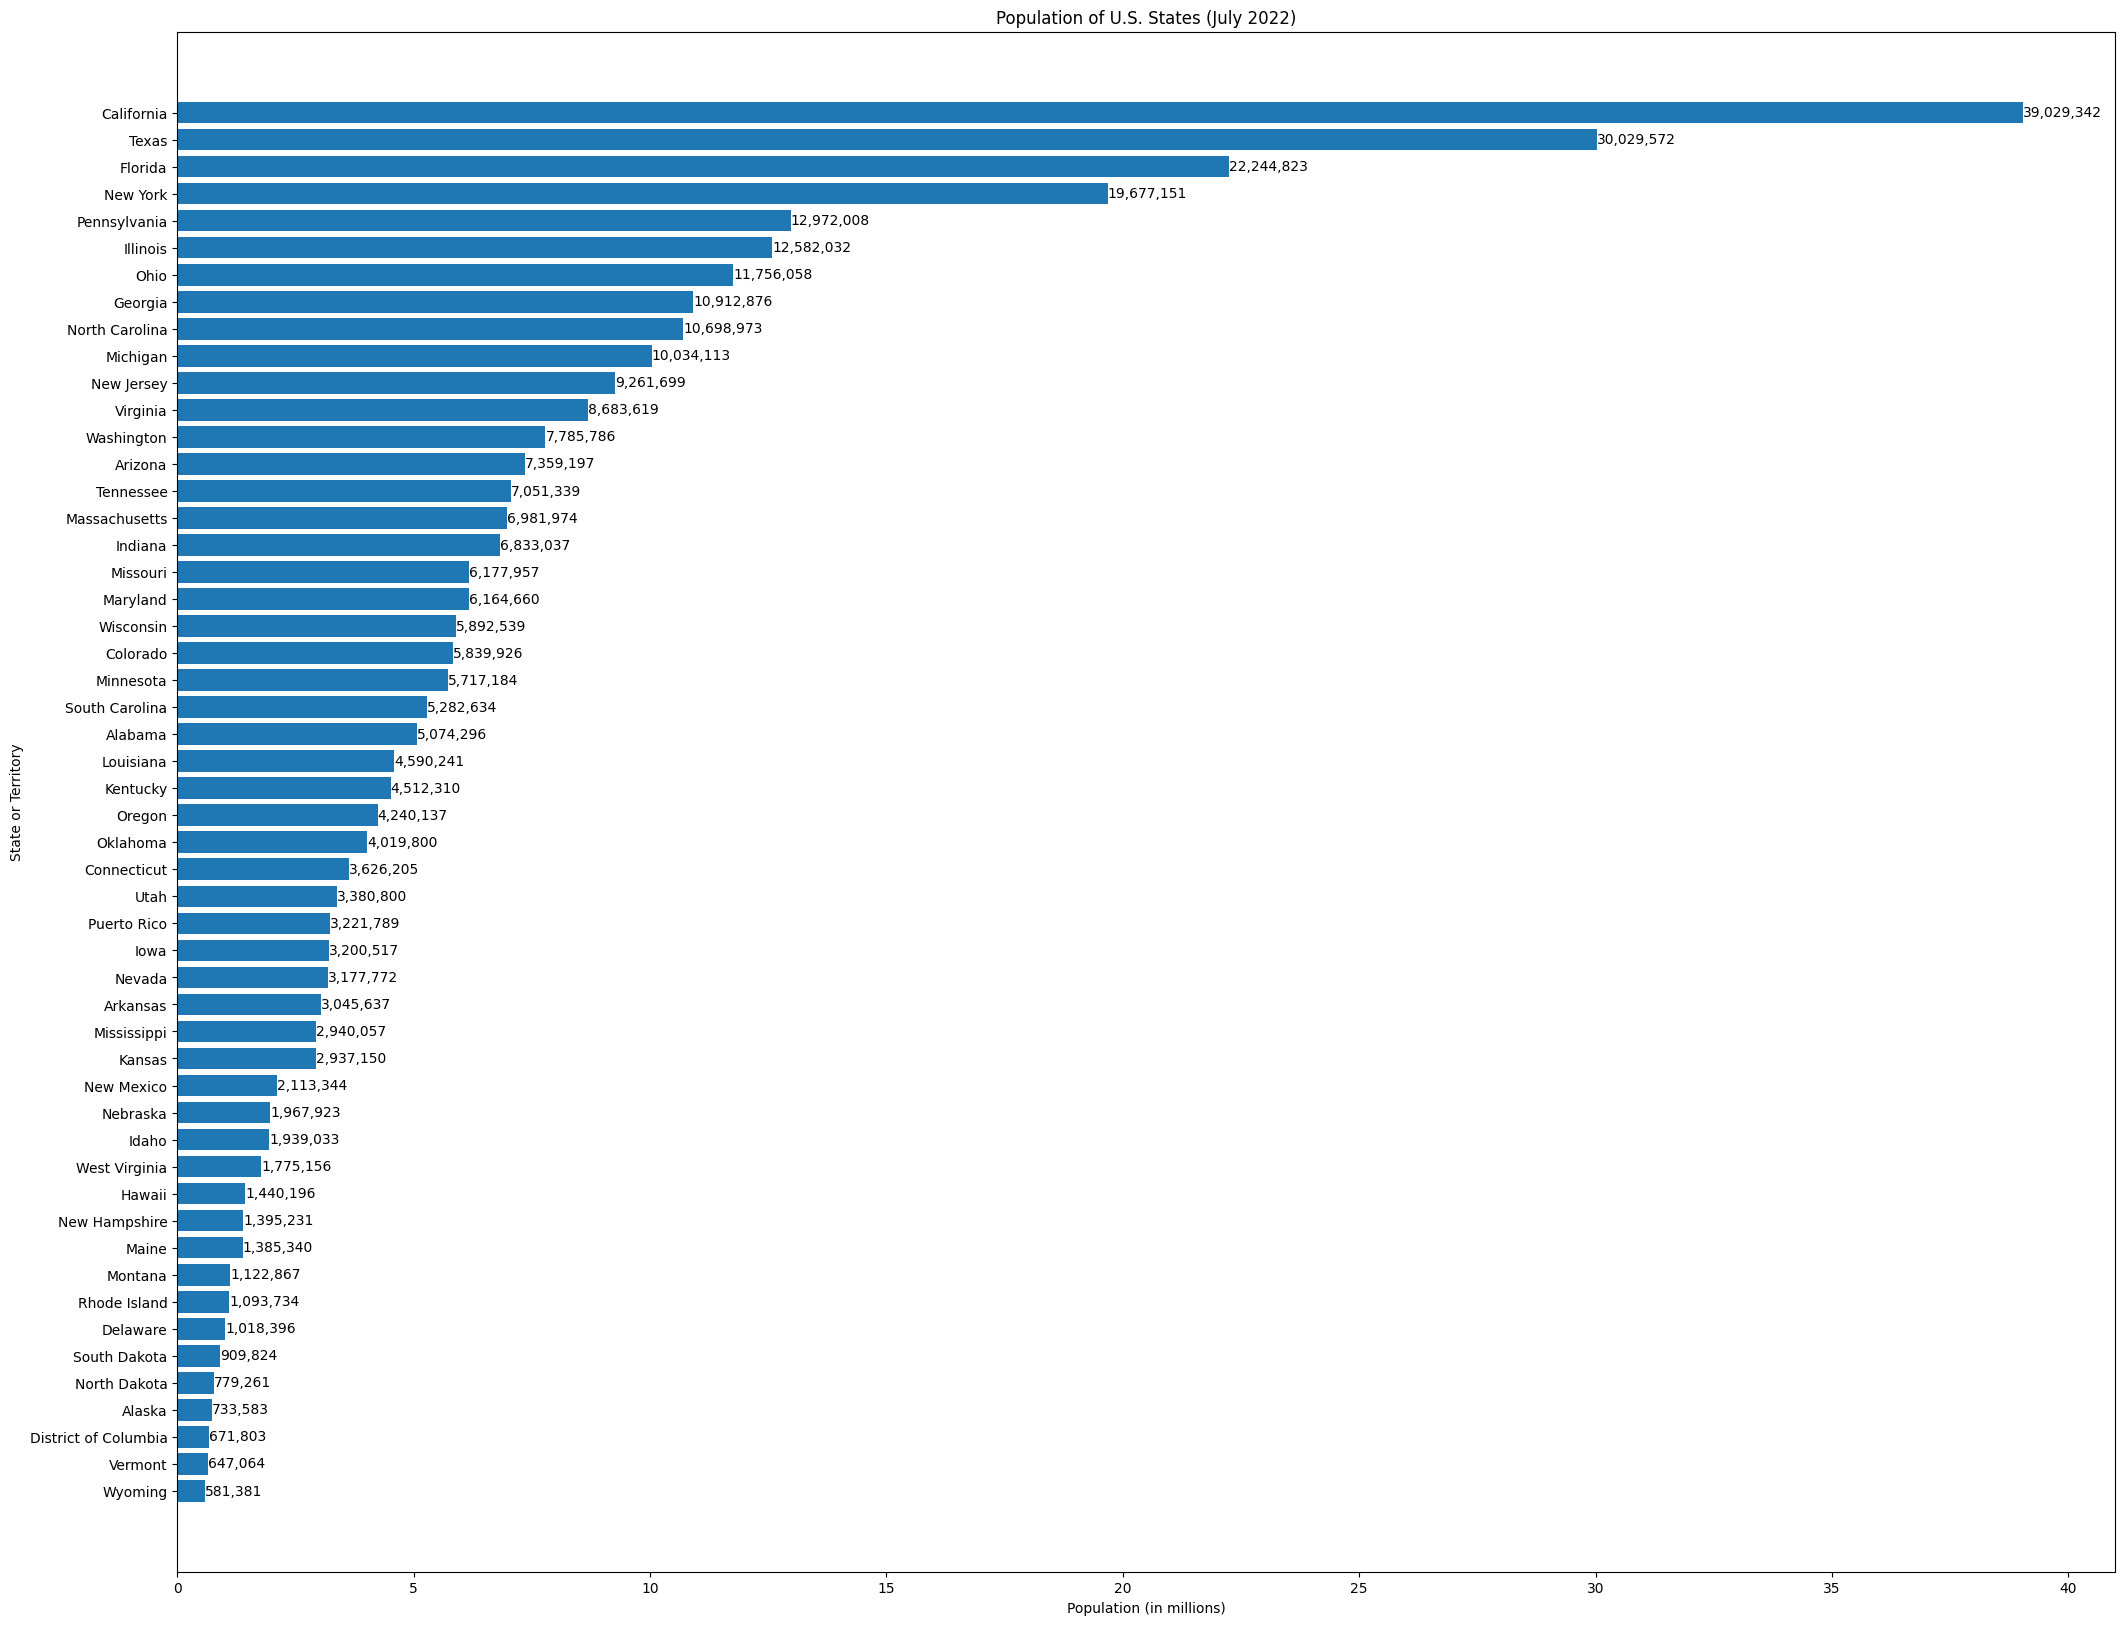

In [28]:
# sorting the DataFrame by population in descending order
new_df = new_df.sort_values(by='July 1, 2022 (est.)', ascending=False)

states = new_df['State or territory']
population_in_millions = new_df['July 1, 2022 (est.)'] / 1e6

plt.figure(figsize=[25,20])
bars = plt.barh(states, population_in_millions)
plt.xlabel('Population (in millions)')
plt.ylabel('State or Territory')
plt.title('Population of U.S. States (July 2022)')

# add the actual population numbers next to the bars
for bar, value in zip(bars, new_df['July 1, 2022 (est.)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value):,}', va='center')

plt.gca().invert_yaxis() # inverts the y-axis so the largest state is at the top

plt.show()
